In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

csvfile_train="Pendulum-v0_train.csv"
csvfile_sm='sm_data.csv'
csvfile_gym='gym_data.csv'

In [2]:
data_train= pd.read_csv(csvfile_train)
data_pred_sm= pd.read_csv(csvfile_sm)
data_pred_gym= pd.read_csv(csvfile_gym)
data_train.head()
data_pred_gym.head()

,Unnamed: 0,cos,sin,theta_dot
0,0,0.182113,0.983278,-0.101968
1,1,0.138805,0.990320,0.877604
2,2,0.070139,0.997537,1.381164
3,3,-0.026619,0.999646,1.936363
4,4,-0.173662,0.984805,2.958503


In [180]:
data_train.describe()

,action,cos_theta_old,sin_theta_old,theta_dot_old,cos_theta,sin_theta,theta_dot
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,-0.004272,-0.324107,0.001357,0.020931,-0.324116,0.001363,0.020886
std,1.154388,0.650271,0.687099,3.663041,0.650272,0.687101,3.663069
min,-2.000000,-1.000000,-1.000000,-8.000000,-1.000000,-1.000000,-8.000000
25%,-1.007000,-0.909000,-0.666000,-2.620000,-0.909000,-0.666000,-2.620000
50%,-0.007000,-0.557000,0.001000,0.025000,-0.557000,0.001000,0.025000
75%,0.996000,0.190000,0.668250,2.666000,0.190000,0.668250,2.666000
max,2.000000,1.000000,1.000000,8.000000,1.000000,1.000000,8.000000


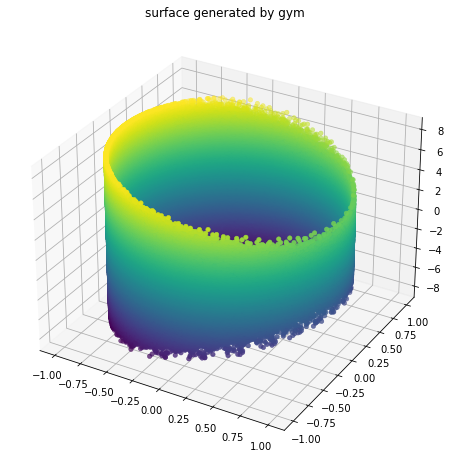

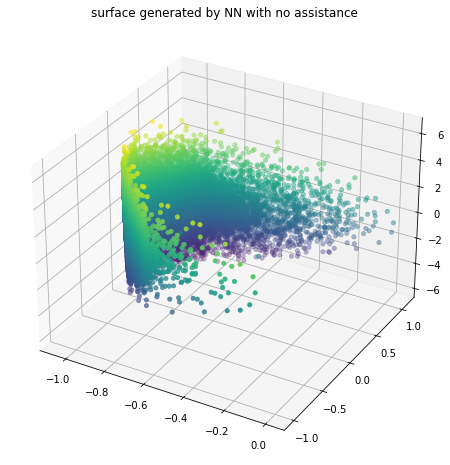

In [181]:
X=data_train['cos_theta'];Y=data_train['sin_theta']; Z=data_train['theta_dot']
X_sm=data_pred_sm['cos'];Y_sm=data_pred_sm['sin']; Z_sm=data_pred_sm['theta_dot']
X_gym=data_pred_gym['cos'];Y_gym=data_pred_gym['sin']; Z_gym=data_pred_gym['theta_dot']
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
#ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)
#ax.scatter(X, Y, Z, c='y', linewidth=0.5);
#ax.scatter(X_sm, Y_sm, Z_sm, c='r', linewidth=0.5);
ax.scatter(X_gym, Y_gym, Z_gym, c=Z_gym, cmap='viridis', linewidth=0.5);
plt.title("surface generated by gym")
plt.savefig('./fig/gym_data.png')
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
#ax.plot_trisurf(X, Y, Z, linewidth=0, antialiased=False)
#ax.scatter(X, Y, Z, c='y', linewidth=0.5);
ax.scatter(X_sm, Y_sm, Z_sm, c=Z_sm, cmap='viridis', linewidth=0.5);
plt.title("surface generated by NN with no assistance")
plt.savefig('./fig/10_trace/zero_assist.png')

In [17]:
theta=np.linspace(-2*np.pi, 2*np.pi)
theta_pred= 2*np.arctan((np.sin(theta)/(np.cos(theta)+1)))

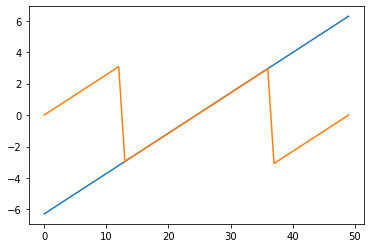

In [19]:
plt.plot(theta)
plt.plot(theta_pred)

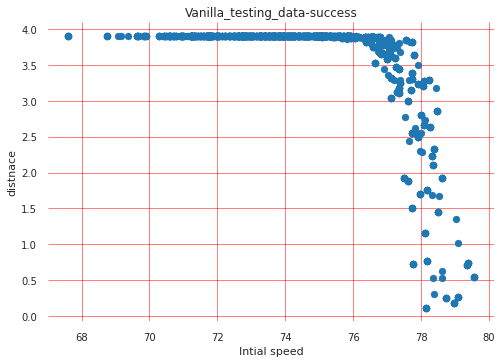

In [38]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.title('Vanilla_testing_data-success')
plt.savefig('Vanilla_test1.png')
plt.show()

In [39]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance,test
0,0,75.91,0.9,-50.35,3.89,0.0
1,1,79.37,0.9,-1036.14,-1.44,1.0
2,2,74.62,0.9,-50.22,3.90,0.0
3,3,77.06,0.9,-56.92,3.70,0.0
4,4,73.03,0.9,-50.25,3.90,0.0


Total number of episodes: 2471
Number of Pass: 1971
Number of fail: 500


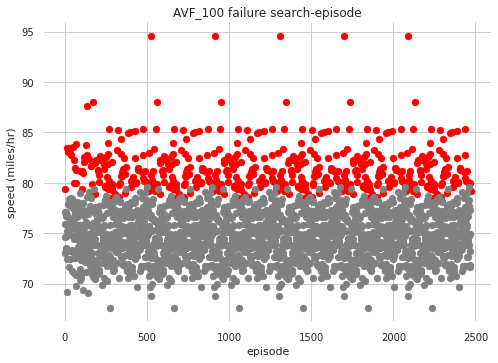

In [40]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=0
end=data_test['Episode'].shape[0]

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0,95])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.title('AVF_500 failure search-episode')
plt.savefig('AVF_100fails.png')
plt.show()